#### Problem: Cluster-based Unsupervised Anomaly Detection

Technique: Gaussian Mixture Model

Language: Python

Library: GaussianMixture (sklearn.cluster)

Reference: https://towardsdatascience.com/understanding-anomaly-detection-in-python-using-gaussian-mixture-model-e26e5d06094b

### Import Libraries

In [1]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


### Generate Data

In [2]:
X, y_true = make_blobs(n_samples=400, centers=5, cluster_std=0.60, random_state=1)
X_append, y_true_append = make_blobs(n_samples=50,centers=5, cluster_std=5,random_state=1)
X = np.vstack([X,X_append])
y_true = np.hstack([[0 for _ in y_true], [1 for _ in y_true_append]])
X = X[:, ::-1] # flip axes for better plotting but it is not mendatory
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.33, random_state=1, shuffle=True)

### Show the data

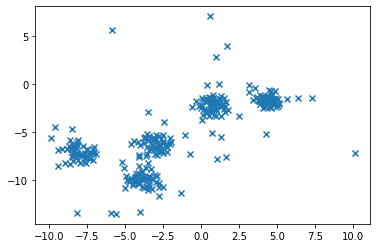

In [3]:
# Show training data
plt.scatter(X_train[:,0],X_train[:,1],marker="x");

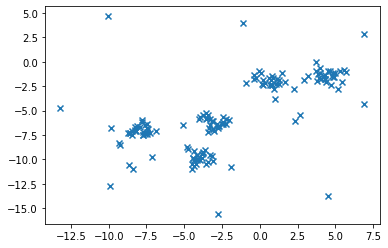

In [4]:
# Show test data
plt.scatter(X_test[:,0],X_test[:,1],marker="x");

### Train the Gaussian Mixture model

In [5]:
gm = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0, )
gm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

### Predict the likelihood of the data under the model

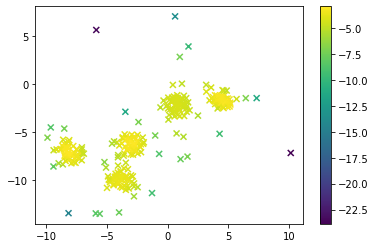

In [6]:
# Predict on train data
# score_samples(X) Return the per-sample likelihood of the data under the model.
plt.scatter(X_train[:,0],X_train[:,1],c=gm.score_samples(X_train),cmap='viridis',marker='x')
plt.colorbar();

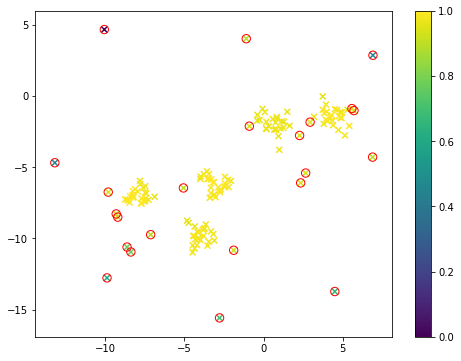

In [7]:
# Predict on test data
# score_samples(X) Return the per-sample likelihood of the data under the model.
gmp = gm.score_samples(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],c=gmp,cmap='viridis',marker='x')

gm_outliers = np.nonzero(gmp<-5)
plt.scatter(X_test[gm_outliers,0],X_test[gm_outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);

plt.colorbar();

### Now do some analysis of why we need Gaussian Mixture model over simple Gaussian model. 

In [8]:
def estimateGaussian(X):
    m = X.shape[0]
    #compute mean of X
    sum_ = np.sum(X,axis=0)
    mu = (sum_/m)
    # compute variance of X
    var = np.var(X,axis=0)
    print(mu, var)
    return mu,var

In [9]:
def multivariateGaussian(X, mu, sigma):
    k = len(mu)
    sigma=np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p

[-1.83507767 -5.34263936] [18.71750414 12.12645659]


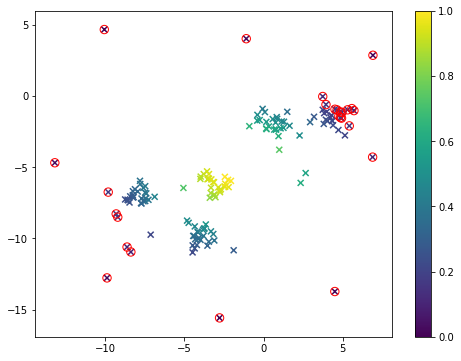

In [10]:
mu, sigma = estimateGaussian(X_train)
p = multivariateGaussian(X_test, mu, sigma)
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],marker="x",c=p,cmap='viridis');
outliers = np.nonzero(p<0.002)[0]
plt.scatter(X_test[outliers,0],X_test[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);
plt.colorbar();

### Comment

The comperison clearly shows that Gaussian Mixture model gives better accuracy than a single Gaussian